In [24]:

rg.df
mbkbmadflbn
'iojbkdsmvjb'ioASJDg blvimport numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers


import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [25]:
WIDTH = 151
HEIGHT = 136
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 30
NEW_SIZE = 136
TRAIN_PATH = 'Train'
TEST_PATH = 'Test'

In [26]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            directory=TRAIN_PATH,
            shuffle=True,
            image_size=(WIDTH,HEIGHT),
            batch_size = BATCH_SIZE,
)

Found 416 files belonging to 2 classes.


In [27]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            directory=TEST_PATH,
            shuffle=True,
            image_size=(WIDTH,HEIGHT),
            batch_size = BATCH_SIZE,
)

Found 134 files belonging to 2 classes.


In [28]:
classnames = train_dataset.class_names
classnames

['Parasite', 'Uninfected']

# Plotting Some Images:

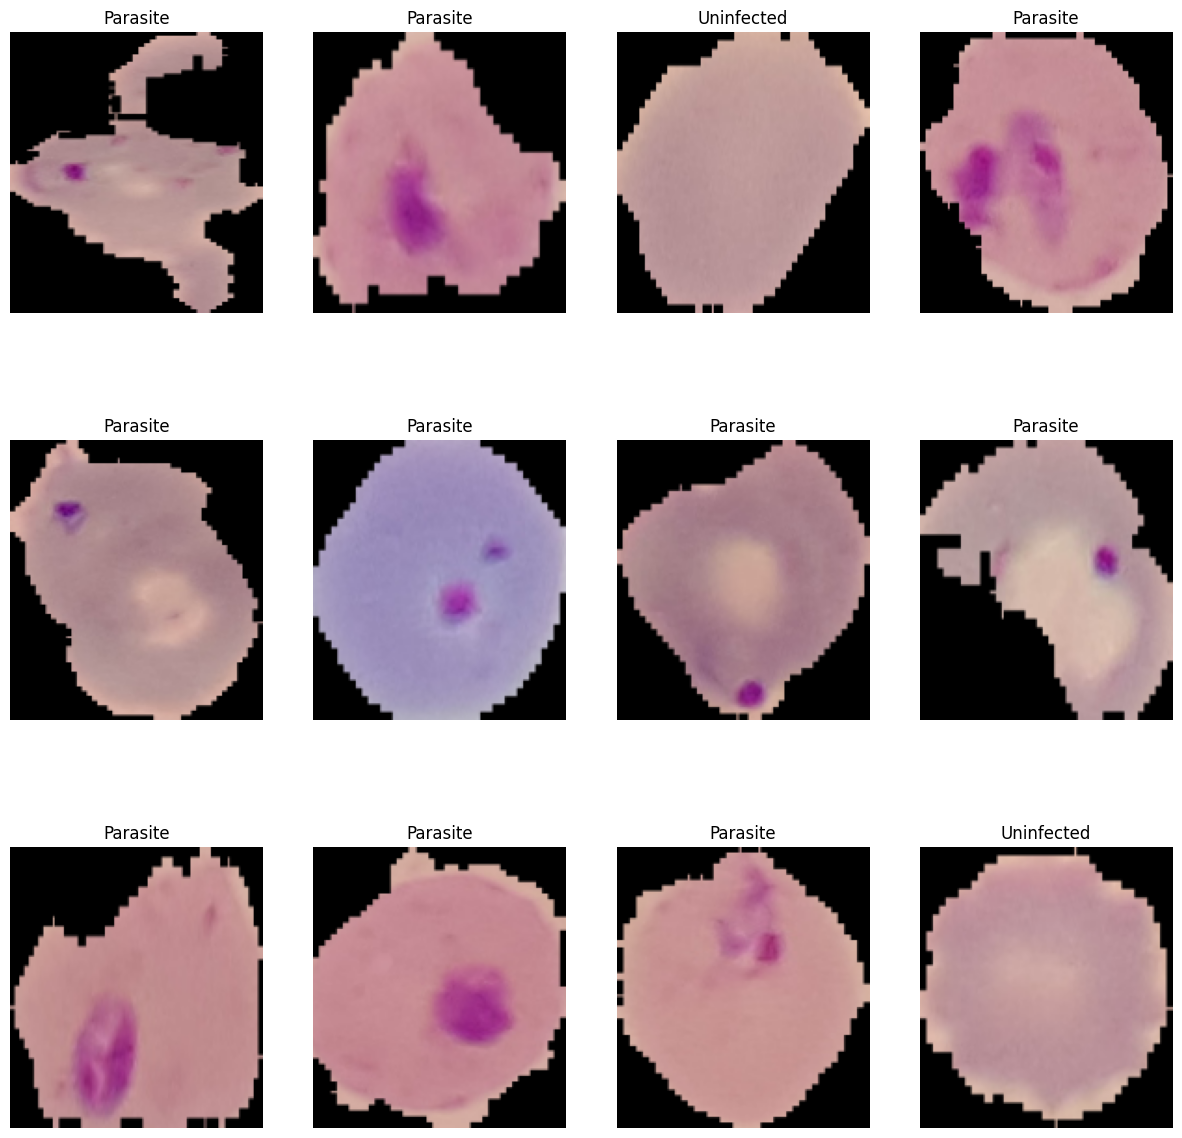

In [29]:
plt.figure(figsize = (15,15))
for image, label in train_dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(classnames[label[i]])
        plt.axis('off')
    
    

# Splitting Data:
* 90% for Trainig
* 10% for Validation

In [30]:
def split_data(ds, train_ratio = .9, shuffle = True, shuffle_size = 1000):
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    ds_size = len(ds)
    train_size = int(ds_size * train_ratio)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size)
    
    return train_ds, val_ds
    
    

In [31]:
train_ds, val_ds = split_data(train_dataset)

In [32]:
len(train_ds), len(val_ds)

(11, 2)

# Cashing:

In [33]:
# caching,shuffle and prefetching the data
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_dataset.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)

# Preprocessing:

In [34]:
# Image Preprocessing : Rescaling and Resizing
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(WIDTH, HEIGHT),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [35]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(factor = 0.3)
])

# Modeling

In [36]:
input_shape = (BATCH_SIZE, WIDTH, HEIGHT, CHANNELS)

In [37]:
input_shape

(32, 151, 136, 3)

In [38]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu', padding ='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(256, (3,3), activation = 'relu',padding ='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation= 'sigmoid')
    
])

In [39]:
model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [17]:
history = model.fit(train_ds,
         epochs= EPOCHS,
         batch_size= BATCH_SIZE,
         verbose= 1,
         validation_data= val_ds)


Epoch 1/30


11/11 [==============================] - 21s 1s/step - loss: 0.7276 - accuracy: 0.5568 - val_loss: 0.6786 - val_accuracy: 0.5938
Epoch 2/30
11/11 [==============================] - 14s 1s/step - loss: 0.6884 - accuracy: 0.5341 - val_loss: 0.6726 - val_accuracy: 0.5938
Epoch 3/30
11/11 [==============================] - 14s 1s/step - loss: 0.6420 - accuracy: 0.6676 - val_loss: 0.6051 - val_accuracy: 0.7188
Epoch 4/30
11/11 [==============================] - 14s 1s/step - loss: 0.5738 - accuracy: 0.7188 - val_loss: 0.5751 - val_accuracy: 0.6562
Epoch 5/30
11/11 [==============================] - 14s 1s/step - loss: 0.6362 - accuracy: 0.6392 - val_loss: 0.5569 - val_accuracy: 0.5938
Epoch 6/30
11/11 [==============================] - 14s 1s/step - loss: 0.5201 - accuracy: 0.7301 - val_loss: 0.4842 - val_accuracy: 0.8125
Epoch 7/30
11/11 [==============================] - 14s 1s/step - loss: 0.3984 - accuracy: 0.8693 - val_loss: 0.7407 - val_accuracy: 0.6719
Epoch 8/30
11/11 [

# Evaluating Model

In [18]:
scores = model.evaluate(test_ds)

5/5 [==============================] - 2s 362ms/step - loss: 0.3046 - accuracy: 0.8806


In [19]:
# Getting the model history to analyse
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

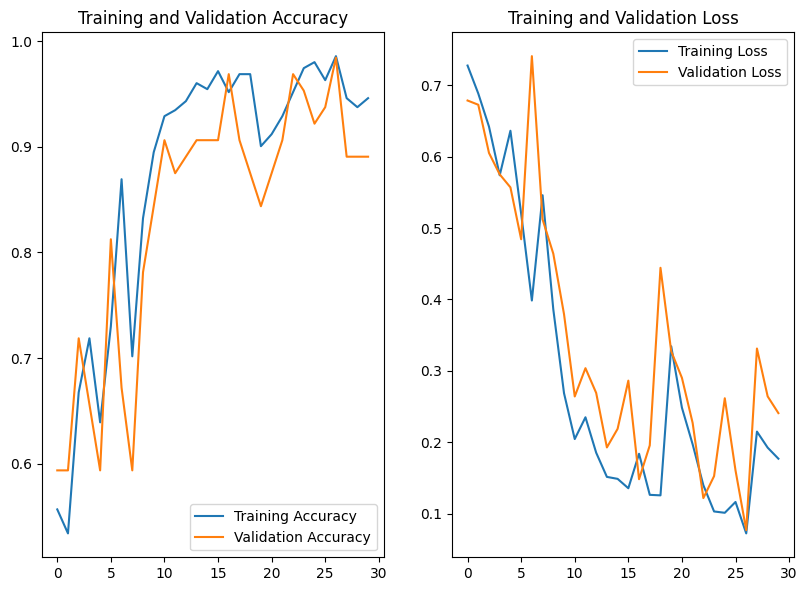

In [20]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

# Make prediction:

model.predict(t

In [21]:
def predict_malaria(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array = tf.expand_dims(img_array, 0)

    prediction = np.squeeze(model.predict(img_array))
    if prediction < .5:
        pred_class = classnames[0]
        confidence = np.round((1- prediction)* 100, 2)
    else:
        pred_class = classnames[1]
        confidence = np.round(prediction* 100, 2)
        
  
    return pred_class, confidence

1/1 [==============================] - 0s 79ms/step


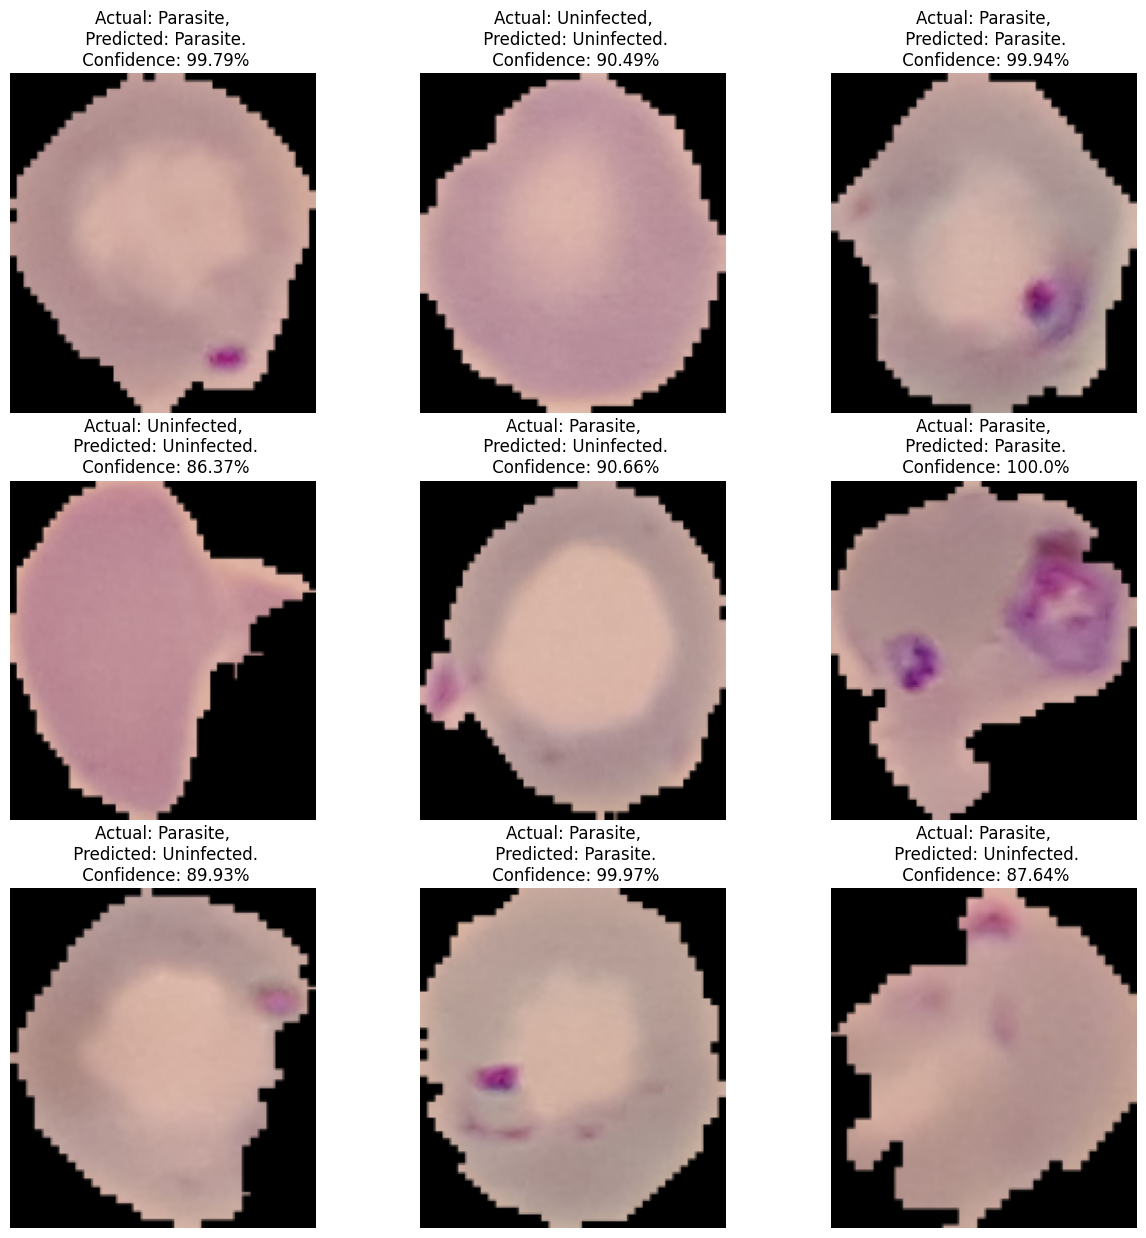

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict_malaria(model, images[i])
        actual_class = classnames[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")


# Save Model:

In [23]:
model.save('malaria_pred_cnn.h5')

C:\Users\abhin\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
